<a href="https://colab.research.google.com/github/la26092002/API_Blog_express_Mongodb/blob/main/EfficientNetB0__2_Copie_de_CNN_BinaryClassification(DDD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.17.1


100%|██████████| 2.58G/2.58G [00:15<00:00, 183MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ismailnasri20/driver-drowsiness-dataset-ddd/versions/1/Driver Drowsiness Dataset (DDD)
2 classes: ['Drowsy', 'Non Drowsy']


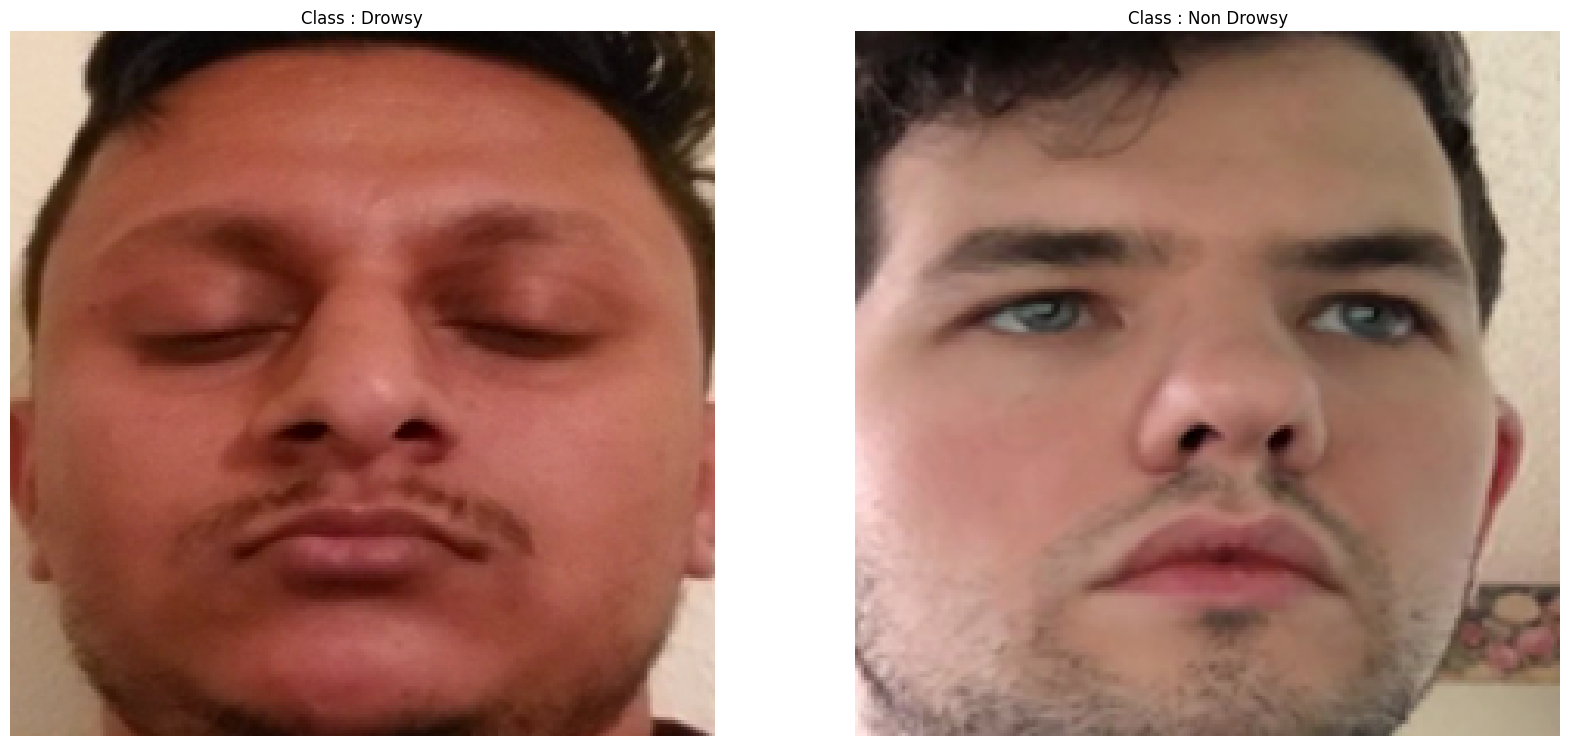

Getting Data...
Preparing training dataset...
Found 33435 images belonging to 2 classes.
Preparing validation dataset...
Found 8358 images belonging to 2 classes.
[
['Drowsy', 'Non Drowsy']
]
Data generators ready
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 8, 8, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      20,971,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,021,604 (95.45 MB)

 Trainable params: 24,979,581 (95.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

None
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


523/523 ━━━━━━━━━━━━━━━━━━━━ 659s 1s/step - accuracy: 0.7773 - loss: 5.3972 - val_accuracy: 0.4460 - val_loss: 5.3768 - learning_rate: 1.0000e-05
Epoch 2/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 528s 999ms/step - accuracy: 0.9802 - loss: 4.2704 - val_accuracy: 0.7465 - val_loss: 4.5442 - learning_rate: 1.0000e-05
Epoch 3/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.9910 - loss: 3.5529 - val_accuracy: 0.6953 - val_loss: 4.2157 - learning_rate: 1.0000e-05
Epoch 4/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 528s 999ms/step - accuracy: 0.9964 - loss: 2.9026 - val_accuracy: 0.7067 - val_loss: 3.5959 - learning_rate: 1.0000e-05
Epoch 5/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 528s 999ms/step - accuracy: 0.9977 - loss: 2.3122 - val_accuracy: 0.7319 - val_loss: 2.9322 - learning_rate: 1.0000e-05
Epoch 6/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 529s 1000ms/step - accuracy: 0.9985 - loss: 1.7906 - val_accuracy: 0.7263 - val_loss: 2.4964 - learning_rate: 1.0000e-05
Epoch 7/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 528s 1000ms/step

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Print TensorFlow version
print('TensorFlow version:', tf.__version__)

# Import kagglehub to download the dataset
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")
data_path = os.path.join(path, "Driver Drowsiness Dataset (DDD)")
print("Path to dataset files:", data_path)

# Check if data path exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset folder not found at {data_path}")

# Get the class names (only directories)
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
classes.sort()
print('{} classes: {}'.format(len(classes), classes))

# Display one random image of each class
fig = plt.figure(figsize=(20, 35))
i = 0
for sub_path in classes:
    i += 1
    # Choose a random image from the class
    img_file = random.choice(os.listdir(os.path.join(data_path, sub_path)))
    img_path = os.path.join(data_path, sub_path, img_file)

    # Read and display the image
    img = mpimg.imread(img_path)
    ax = fig.add_subplot(1, len(classes), i)
    ax.axis('off')
    ax.imshow(img)
    ax.set_title('Class : ' + sub_path)
plt.show()

# Data Augmentation and Preparation
img_size = (227, 227)
batch_size = 64

print("Getting Data...")
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # hold back 20% of the images for validation
)

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # set as training data
)

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # set as validation data
)

classnames = list(train_generator.class_indices.keys())
print('[')
print(classnames)
print(']')
print('Data generators ready')

# Model Architecture
# Load EfficientNetB0 (pretrained model) without the top layer
efficient_net = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Fine-tune the last layers
for layer in efficient_net.layers[-10:]:
    layer.trainable = True

# Build the model
model = Sequential([
    efficient_net,  # Add EfficientNetB0 base model
    Flatten(),      # Flatten the output of EfficientNetB0
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Add a dense layer with L2 regularization
    Dropout(0.6),   # Add dropout for regularization
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Print model summary
print(model.summary())

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


In [2]:
# Save the model
model.save('driver_drowsiness_model.h5')
print("Model saved as 'driver_drowsiness_model.h5'")


Model saved as 'driver_drowsiness_model.h5'


In [3]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [4]:
predictions = model.predict(validation_generator)
predictions = np.round(predictions)

131/131 ━━━━━━━━━━━━━━━━━━━━ 116s 840ms/step


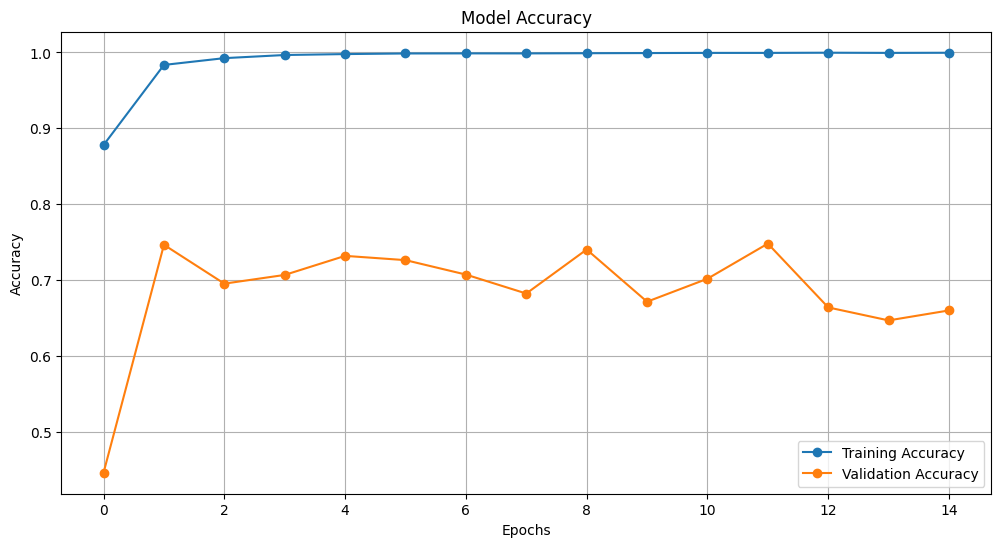

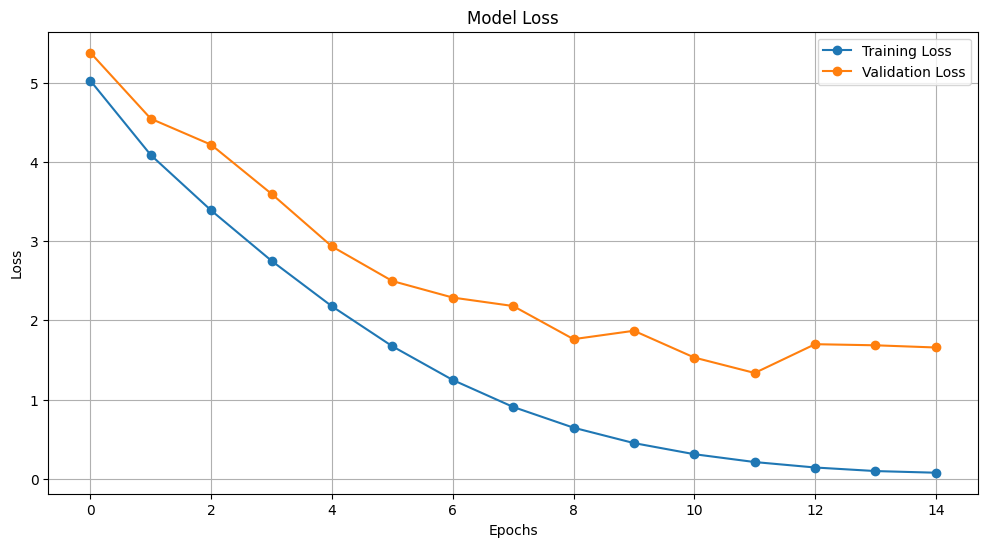

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


131/131 ━━━━━━━━━━━━━━━━━━━━ 105s 798ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 105s 799ms/step


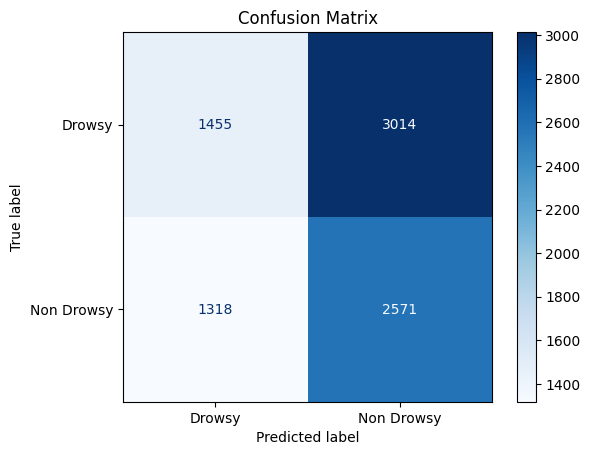

In [10]:
# Generate predictions for the validation set
validation_predictions = model.predict(validation_generator).ravel()

# Convert probabilities to binary class predictions
predicted_classes = (validation_predictions > 0.5).astype(int)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the validation set
validation_predictions = model.predict(validation_generator).ravel()

# Convert probabilities to binary class predictions
predicted_classes = (validation_predictions > 0.5).astype(int)

# Calculate confusion matrix
validation_classes = validation_generator.classes
cm = confusion_matrix(validation_classes, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classnames)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model to Google Drive
model_save_path = '/content/drive/MyDrive/Models/driver_drowsiness_model.h5'
model.save(model_save_path)
print(f"Model saved at {model_save_path}")


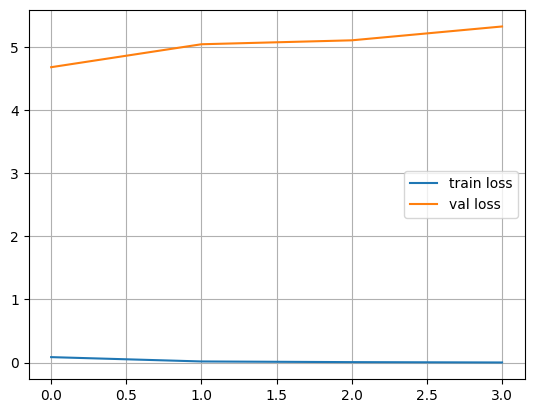

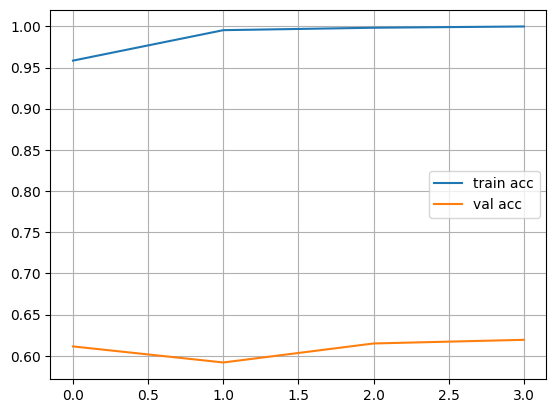

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
#plot the val_loss function
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.grid()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plot the val_accuracy score
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def predictImage(filename):
    # Load the image with the target size
    img1 = image.load_img(filename, target_size=(227, 227))
    # Display the image
    plt.imshow(img1)
    # Convert the image to an array
    Y = image.img_to_array(img1)
    # Expand dimensions to match the model input shape
    X = np.expand_dims(Y, axis=0)
    # Normalize the input data (if required, based on how your model was trained)
    X = X / 255.0  # Assuming your model expects normalized data

    # Predict the test dataset
    val = model.predict(X)
    print(f"Raw model output: {val}")  # Debugging output

    # Decode the prediction
    # Assuming binary classification, where val[0][0] represents the probability of class 1
    predicted_label = 1 if val[0][0] > 0.5 else 0

    # Set the label based on the prediction
    if predicted_label == 1:
        plt.xlabel("Drowsy", fontsize=30)
    else:
        plt.xlabel("Non Drowsy", fontsize=30)


In [ ]:
# Save the entire model
model.save('drowsiness_detection_model.keras')


In [ ]:
# Import kagglehub to download the dataset
import kagglehub

path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

data_path = os.path.join(path, "Driver Drowsiness Dataset (DDD)/Non Drowsy/a0004.png")
predictImage(data_path)